In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [12]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
# Check the columns of the 'transactions' dataset
print(transactions.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [4]:
print(customers.columns)

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


In [32]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Preprocess Customer Data
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
customers['DaysSinceSignup'] = (pd.to_datetime('today') - customers['SignupDate']).dt.days
region_encoded = pd.get_dummies(customers['Region'], drop_first=True)

# Aggregate Transaction Data by Customer
transaction_features = transactions.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

In [33]:
# Merge Customer and Transaction Data
customer_features = pd.concat([customers[['CustomerID', 'DaysSinceSignup']], region_encoded], axis=1)
data = pd.merge(customer_features, transaction_features, on='CustomerID')

# Drop CustomerID and check for missing values
data = data.drop(columns=['CustomerID'])
data = data.fillna(data.mean())  # Fill missing values with mean for numerical columns

# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')


In [34]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


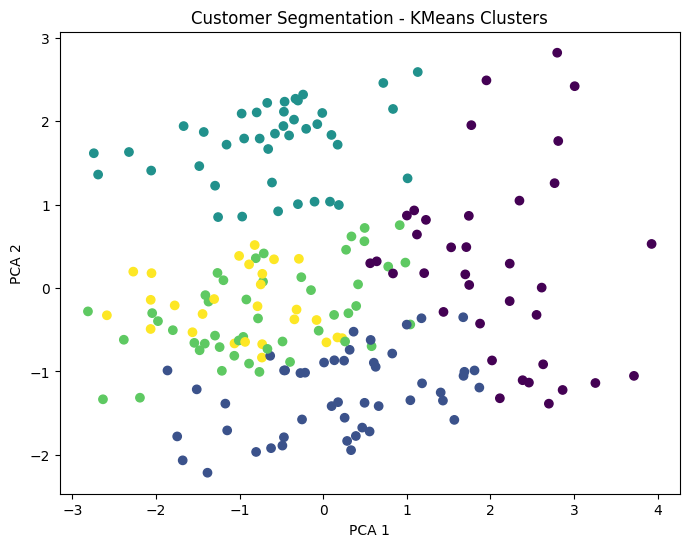

In [35]:
# Evaluate Clustering
sil_score = silhouette_score(scaled_data, kmeans_labels)
db_index = davies_bouldin_score(scaled_data, kmeans_labels)

# Visualize Clusters with PCA (2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Customer Segmentation - KMeans Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [36]:
# Output Metrics
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.33092504014088453
Davies-Bouldin Index: 1.0884359822893979
